# Simulation 

## 0 Packages

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from myimagelib import bestcolor, readdata
from scipy.signal import medfilt
from skimage import io
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt, argrelextrema, argrelmax, find_peaks
from IPython.display import clear_output
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from scipy.special import erf
from functools import partial
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks
import json
from IPython.display import clear_output
from scipy import integrate

## 1 An example surface evolution

Text(0, 0.5, 'Surface height, $h$ (mm)')

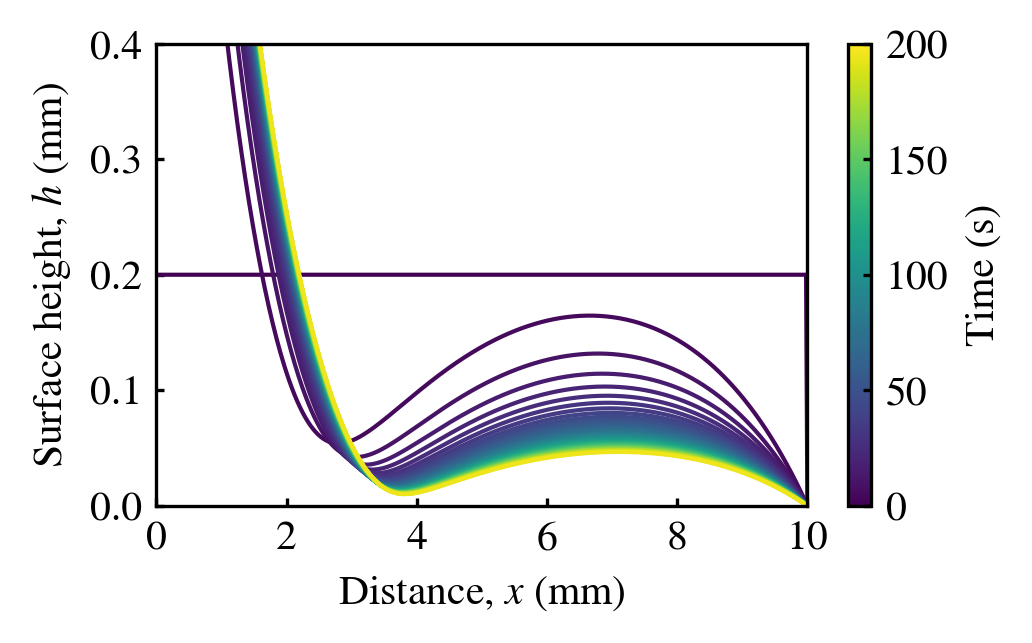

In [20]:
fileDir = r"C:\Users\zl948\Documents\WPM_simulation\Phase_diagram\mu_1.00e-02_sigma_4.20e-02_h0_2.00e-04_L_1.00e-02.h5"
df = pd.read_hdf(fileDir)
count = 0
fig, ax = plt.subplots(figsize=(3.5, 2), dpi=300)
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])

for kw in df.columns[::50]:
    ax.plot(df.index, df[kw], color=cmap(float(kw)/tmax), lw=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, .4])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")
ax.set_xlabel("Distance, $x$ (mm)")
ax.set_ylabel("Surface height, $h$ (mm)")
# plt.tight_layout()
# plt.savefig("zoom_in.svg")

In [15]:
df

,0.000000,0.100050,0.200100,0.300150,0.400200,0.500250,0.600300,0.700350,0.800400,0.900450,...,141.270635,141.370685,141.470735,141.570785,141.670835,141.770885,141.870935,141.970985,142.071036,142.171086
x,,,,,,,,,,,,,,,,,,,,,
0.00000,0.2,0.420104,0.549850,0.640169,0.708737,0.763834,0.810679,0.852162,0.889774,0.923142,...,1.922152,1.922494,1.922838,1.923185,1.923533,1.923884,1.924237,1.924592,1.924950,1.925317
0.02004,0.2,0.412871,0.539030,0.626642,0.693008,0.746364,0.791954,0.832461,0.869094,0.901228,...,1.862191,1.862550,1.862911,1.863274,1.863639,1.864005,1.864374,1.864744,1.865116,1.865673
0.04008,0.2,0.405765,0.528409,0.613387,0.677628,0.729311,0.773696,0.813268,0.848967,0.879937,...,1.808499,1.808869,1.809240,1.809613,1.809988,1.810364,1.810742,1.811122,1.811503,1.812192
0.06012,0.2,0.398786,0.517983,0.600397,0.662586,0.712657,0.755884,0.794559,0.829367,0.859235,...,1.759501,1.759878,1.760257,1.760637,1.761018,1.761401,1.761785,1.762171,1.762557,1.763345
0.08016,0.2,0.391931,0.507749,0.587664,0.647871,0.696388,0.738501,0.776315,0.810269,0.839092,...,1.714198,1.714581,1.714964,1.715349,1.715735,1.716122,1.716510,1.716900,1.717290,1.718152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.91984,0.2,0.018525,0.015919,0.014838,0.014213,0.013850,0.013594,0.013256,0.012808,0.012822,...,0.002483,0.002492,0.002501,0.002511,0.002521,0.002531,0.002542,0.002553,0.002565,0.002578
9.93988,0.2,0.014013,0.012026,0.011202,0.010725,0.010449,0.010256,0.010004,0.009659,0.009669,...,0.001832,0.001838,0.001844,0.001851,0.001858,0.001865,0.001872,0.001880,0.001888,0.001897
9.95992,0.2,0.009425,0.008077,0.007518,0.007195,0.007008,0.006878,0.006711,0.006475,0.006481,...,0.001200,0.001204,0.001207,0.001211,0.001215,0.001219,0.001224,0.001228,0.001233,0.001238


## 2 Mesh size validation

C:\Users\zl948\AppData\Local\Temp\ipykernel_29484\2989807358.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


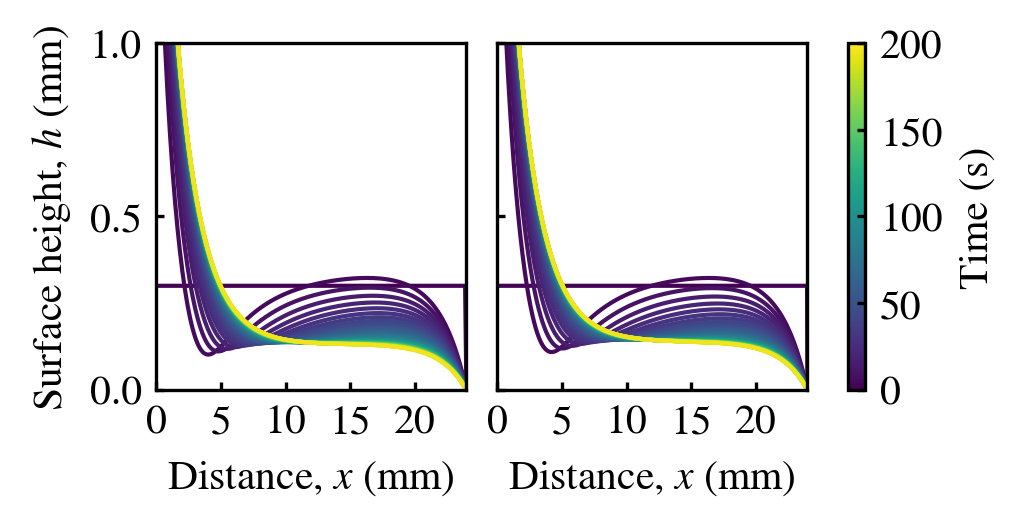

In [ ]:
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\meshsize"
thick = pd.read_csv(os.path.join(folder, "250.csv")).set_index("x")
thin = pd.read_csv(os.path.join(folder, "1000.csv")).set_index("x")
fig, ax = plt.subplots(ncols=2, figsize=(3.5,1.5), dpi=300, sharex=True, sharey=True, gridspec_kw={"wspace":0.1})
cmap = plt.get_cmap("viridis")
tmax = float(thin.columns[-1])
for kw in thick.columns[::50]:
    h = thick[kw].values
    x = thick.index.values
    ax[0].plot(thick.index, thick[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[0].set_xlim([0, 24])
    ax[0].set_ylim([0, 1])
    ax[0].set_xlabel("Distance, $x$ (mm)")
    ax[0].set_ylabel("Surface height, $h$ (mm)")
for kw in thin.columns[::50]:
    h = thin[kw].values
    x = thick.index.values
    ax[1].plot(thin.index, thin[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[1].set_xlim([0, 24])
    ax[1].set_ylim([0, 1])
    ax[1].set_xticks([0,5,10,15,20])
    ax[1].set_yticks([0, .5, 1])
    ax[1].set_xlabel("Distance, $x$ (mm)")
# add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")
plt.tight_layout()
plt.savefig("meshsize.svg")

C:\Users\zl948\AppData\Local\Temp\ipykernel_29484\3238037592.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


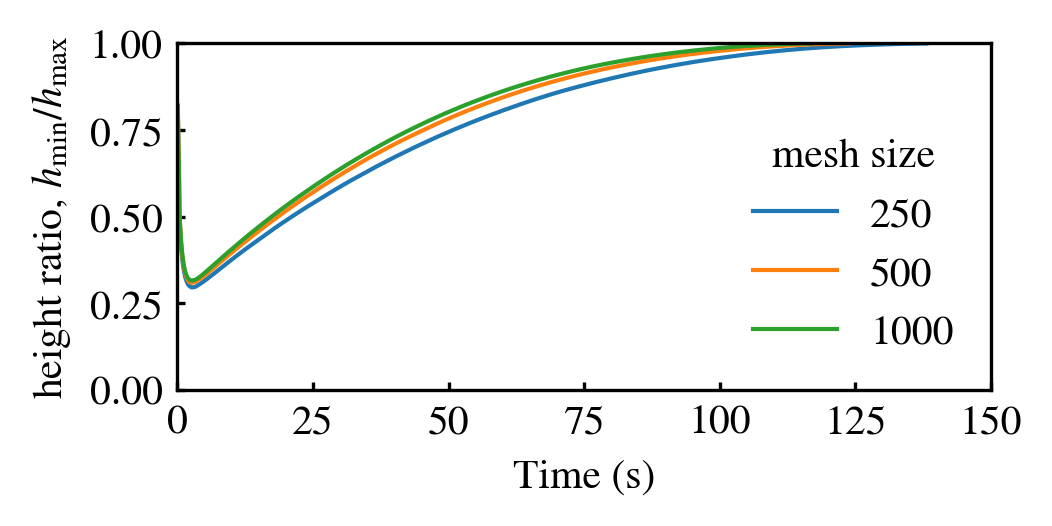

In [ ]:
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\meshsize\dimple_detection"
sparse = pd.read_csv(os.path.join(folder, "250.csv"))
dense = pd.read_csv(os.path.join(folder, "500.csv"))
denser = pd.read_csv(os.path.join(folder, "1000.csv"))
fig, ax = plt.subplots(ncols=1, figsize=(3.5,1.5), dpi=300, sharex=True, sharey=True, gridspec_kw={"wspace":0.1})
ax.plot(sparse.t, sparse.minima/sparse.maxima, lw=1, label="250")
ax.plot(dense.t, dense.minima/dense.maxima, lw=1, label="500")
ax.plot(denser.t, denser.minima/denser.maxima, lw=1, label="1000")
# ax.plot(sparse.t, sparse.minima, lw=1)
# ax.plot(dense.t, dense.minima, lw=1)
# ax.plot(denser.t, denser.minima, lw=1)
ax.set_ylim([0, 1])
ax.set_xlim([0, 150])
ax.set_xlabel("Time (s)")
ax.set_ylabel("height ratio, $h_\mathrm{min}/h_\mathrm{max}$")
ax.legend(frameon=False, loc="lower right", title="mesh size")
plt.tight_layout()
fig.savefig("meshsize_heightratio.svg")

## 3 Length effect

### 3.1 Examples

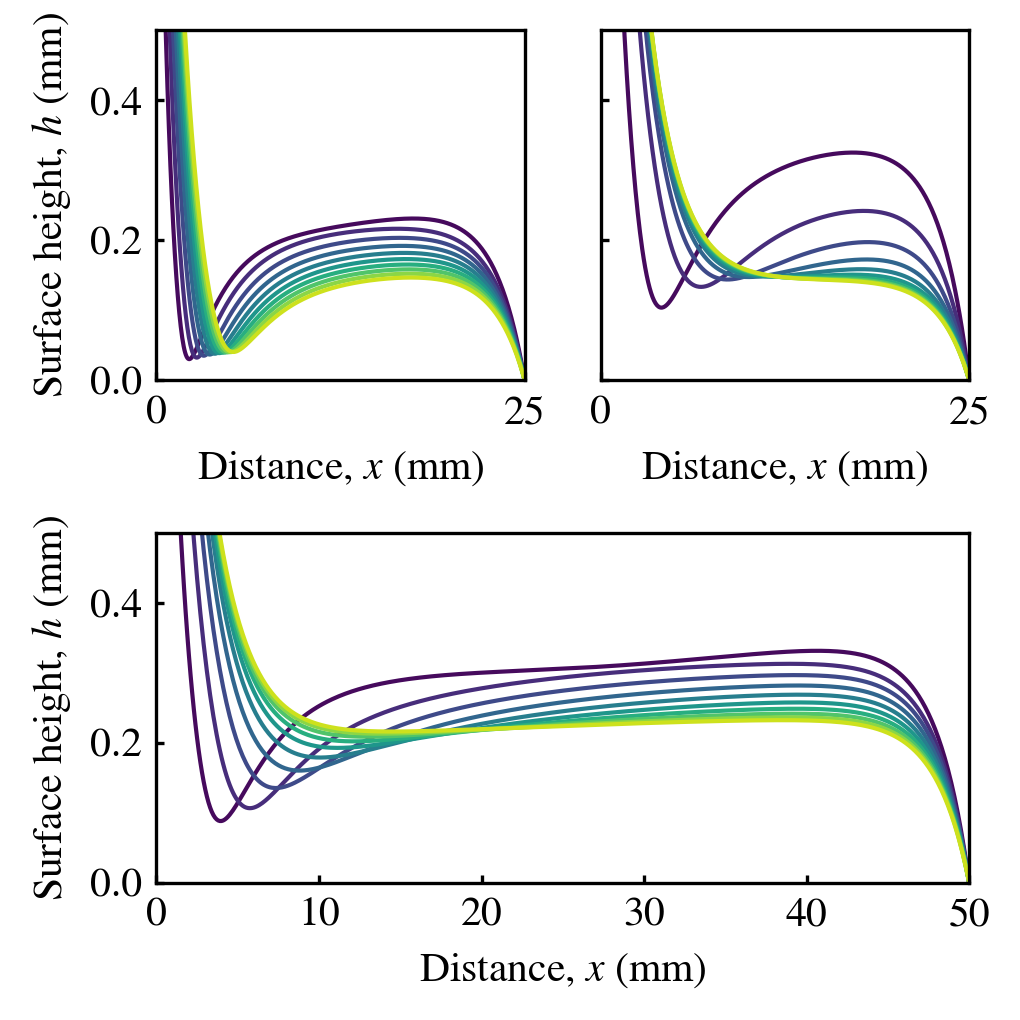

In [96]:
folder = r"C:\Users\zl948\Documents\WPM_simulation\thickness_length"

thin = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_2.00e-04_L_2.50e-02.h5"))
thick = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_3.00e-04_L_2.50e-02.h5"))
longg = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_3.00e-04_L_5.00e-02.h5"))

fig = plt.figure(figsize=(3.5, 3.5), dpi=300)
cmap = plt.get_cmap("viridis")

ax = fig.add_subplot(221)
for kw in thin.columns[50::200]:
    h = thin[kw].values
    x = thin.index.values
    ax.plot(thin.index, thin[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 25])
    ax.set_ylim([0, .5])
    ax.set_xticks([0, 25])
    ax.set_xlabel("Distance, $x$ (mm)")
    ax.set_ylabel("Surface height, $h$ (mm)")
ax = fig.add_subplot(222)
for kw in thin.columns[50::200]:
    h = thick[kw].values
    x = thick.index.values
    ax.plot(thick.index, thick[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 25])
    ax.set_ylim([0, .5])
    ax.set_xticks([0, 25])
    ax.set_yticklabels([])
    ax.set_xlabel("Distance, $x$ (mm)")
    # ax.set_ylabel("Surface height, $h$ (mm)")
ax = fig.add_subplot(212)
for kw in thin.columns[50::200]:
    h = longg[kw].values
    x = longg.index.values
    ax.plot(longg.index, longg[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 50])
    ax.set_ylim([0, .5])
    ax.set_xlabel("Distance, $x$ (mm)")
    ax.set_ylabel("Surface height, $h$ (mm)")
# add a colorbar to the plot
plt.tight_layout()
fig.savefig("thickness_length.svg")

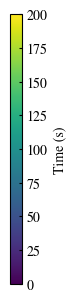

In [102]:
fig, ax = plt.subplots(figsize=(.15, 3.5))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, cax=ax, label="Time (s)")
fig.savefig("colorbar.svg")

### 3.2 Dimple time vs. initial thickness

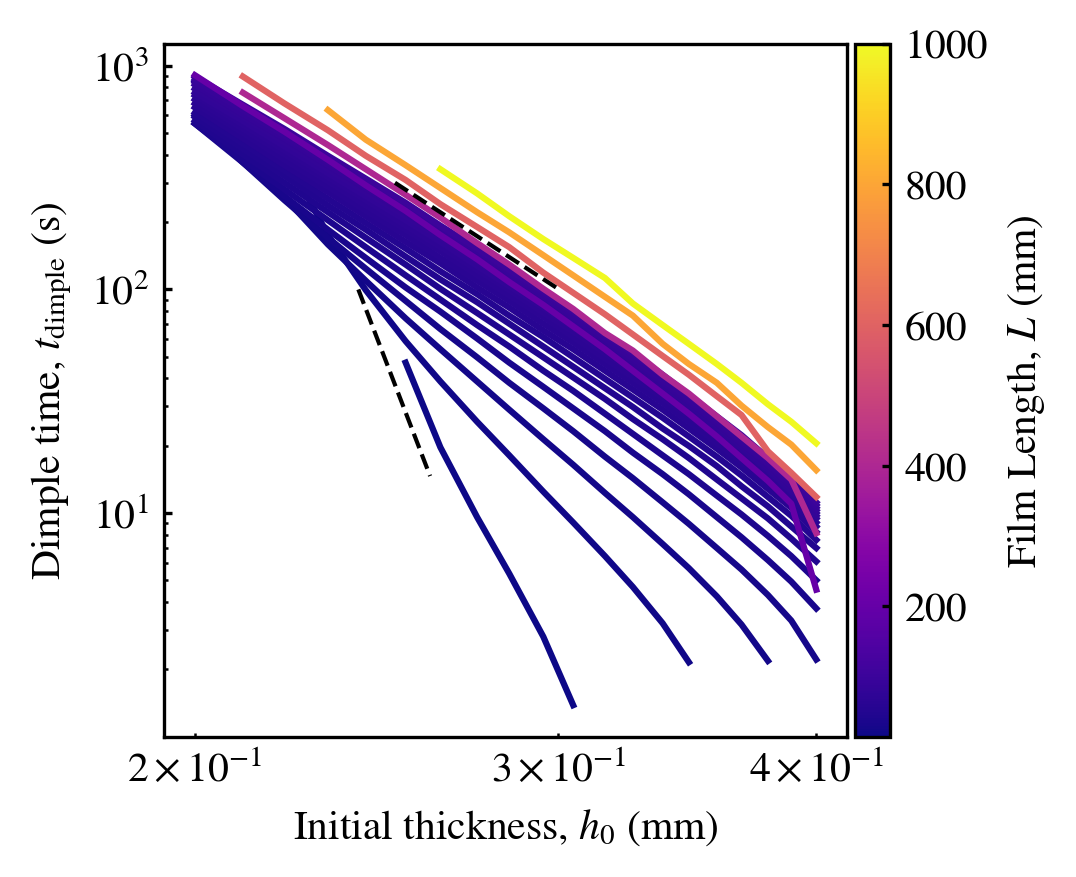

In [59]:
folder = r"C:\Users\zl948\Documents\WPM_simulation\LH_PD"
dimple = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))
cmap = plt.get_cmap("plasma")
dimple.L *= 1e3

dimple = dimple.loc[dimple.sigma==0.042]
# dimple = dimple.loc[dimple.h0>2.2e-4]
dimple = dimple.loc[dimple.t < 1000]
# dimple = dimple.loc[dimple.L <= 1e2]
vmin, vmax = dimple.L.min(), dimple.L.max() # get the min and max of L for color mapping
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300) # create a figure and axis for the plot
for L, gg in dimple.groupby("L"):
    ax.plot(gg.h0*1e3, gg.t, ls="-",  label=f"$L={L:.1f}$ mm", color=cmap((L-vmin)/(vmax-vmin))) # plot the lines for each L, color mapped by L
# ax.set_xlim([0.23, 0.42])
ax.loglog()
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
norm = plt.Normalize(vmin=vmin, vmax=vmax) # create a normalization for the color mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # create a ScalarMappable for the color bar
plt.colorbar(sm, ax=ax, label="Film Length, $L$ (mm)", orientation='vertical', pad=0.01) # add the color bar to the plot
x = np.linspace(.24, .26)
y = x**-24
y = y / y[0] * 100
ax.plot(x, y, "--", color="black", lw=1)
x = np.linspace(.25, .3)
y = x**-6
y = y / y[0] * 300
ax.plot(x, y, "--", color="black", lw=1)
# fig.savefig("dimple_time.svg") # save the figure

In [66]:
def fit_func(x, a, b):
    return a * x**b

# extract scaling exponents
folder = r"C:\Users\zl948\Documents\WPM_simulation\LH_PD"
dimple = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))
dimple = dimple.loc[dimple.h0 <= 3.2e-4]
# dimple = dimple.loc[dimple.L <= 1e-1]
cmap = plt.get_cmap("plasma")
dimple.L *= 1e3
vmin, vmax = dimple.L.min(), dimple.L.max() # get the min and max of L for color mapping
dimple = dimple.loc[dimple.sigma==0.042]
# dimple = dimple.loc[dimple.h0>2.2e-4]
dimple = dimple.loc[dimple.t < 1000]

# 
expos = []
Ls = []
for L, gg in dimple.groupby("L"):
    popt, pcov = curve_fit(fit_func, gg.h0*1e3, gg.t, p0=[1, 1])
    Ls.append(L)
    expos.append(-popt[1])
    # break

Text(0, 0.5, 'Scaling exponent, $\\alpha$')

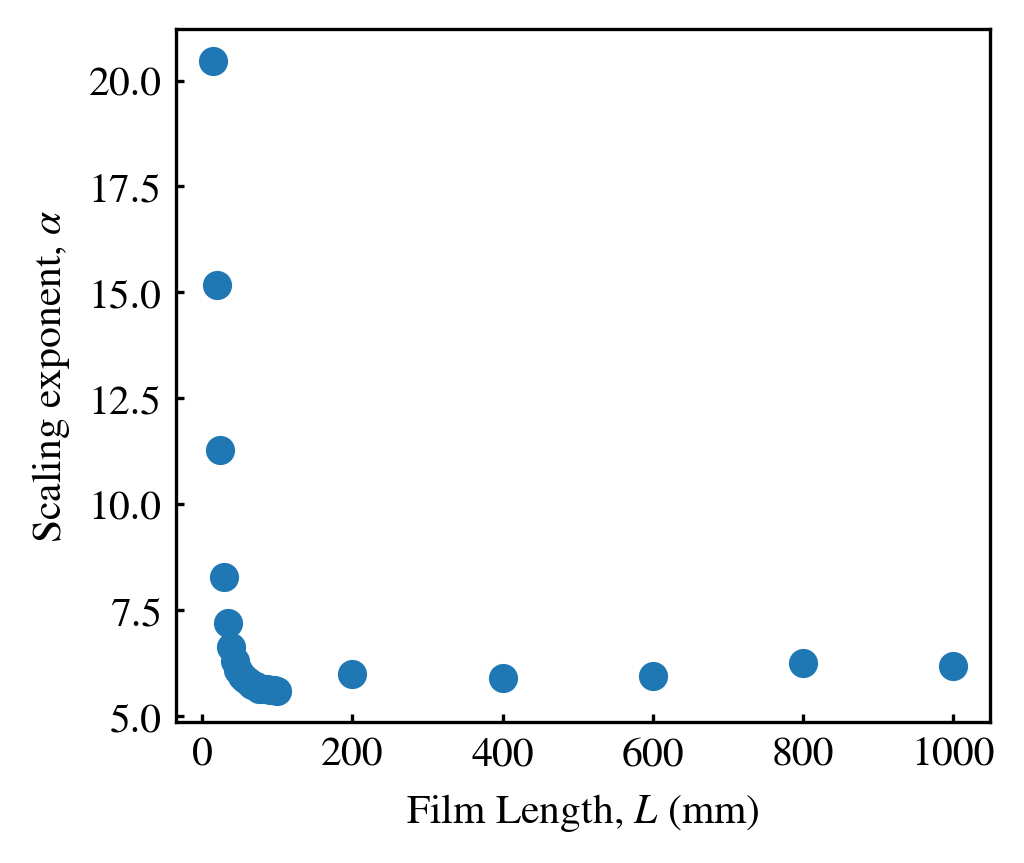

In [67]:
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300) # create a figure and axis for the plot
ax.plot(Ls, expos, "o")
ax.set_xlabel("Film Length, $L$ (mm)")
ax.set_ylabel("Scaling exponent, $\\alpha$")

In [331]:
expos

[16.424516139144522,
 11.678578516335687,
 8.545194960697657,
 7.363974790933372,
 6.725913267131665,
 6.338448216988993,
 6.116438407637092,
 5.9555511334607685,
 5.892532948847676,
 5.795454399391208,
 5.7023274766083185,
 5.6723651355507565,
 5.577086973801789,
 5.577086971145669,
 5.5788775770528085,
 5.546640963652091,
 5.51283183416455,
 5.484178796577146]

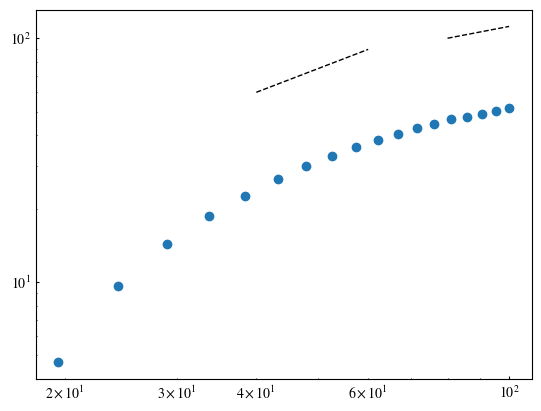

In [254]:
d = dimple.loc[(dimple.h0 >= 3.2e-4) & (dimple.h0 <= 3.3e-4)]
plt.scatter(d.L, d.t)
plt.loglog()
x = np.linspace(80, 100)
y = x ** .5
y = y / y[0] * 100
plt.plot(x, y, "--", color="black", lw=1)
x = np.linspace(40, 60)
y = x ** 1
y = y / y[0] * 60
plt.plot(x, y, "--", color="black", lw=1)

In [79]:
dimple.L.unique()

array([ 100. ,  200. ,   24.2,   28.9,   33.7,   38.4,   43.2,   47.9,
         52.6,   57.4,   62.1,   66.8,   71.6,   76.3,   81.1,   85.8,
         90.5,   95.3,  400. ,  600. ,   19.5,  800. ,   14.7, 1000. ])

## 4 Dominant force and dimple time approximations

### 4.1 Phase diagram

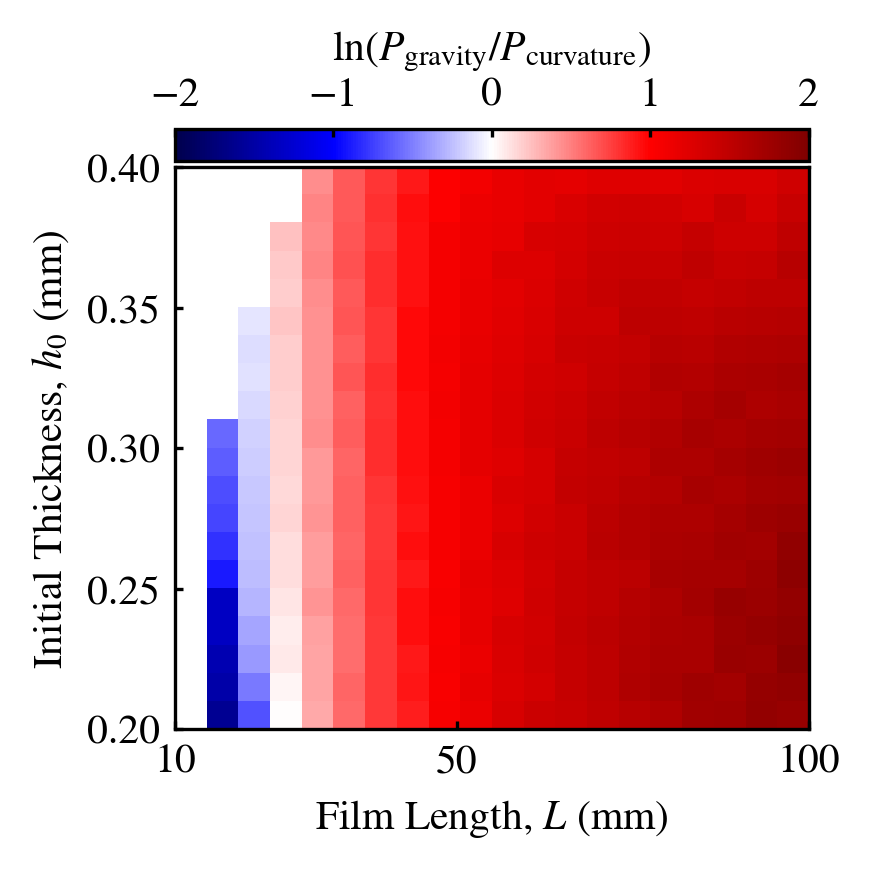

In [61]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = -2, 2
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(np.log(pressure.pg / pressure.pc).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap="seismic", vmin=vmin, vmax=vmax)#, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="seismic", norm=norm)
plt.colorbar(sm, ax=ax, label='$\ln (P_\mathrm{gravity}/P_\mathrm{curvature})$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("pressure_ratio.svg")

### 4.2 Dimple time approximations

In [72]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3

In [84]:
list(pressure.L)

[1000.0,
 100.0,
 10.0,
 14.7,
 19.5,
 200.0,
 24.2,
 28.9,
 33.7,
 38.4,
 400.0,
 43.2,
 47.9,
 52.6,
 57.4,
 600.0,
 62.1,
 66.8,
 71.6,
 76.30000000000001,
 800.0,
 81.10000000000001,
 85.8,
 90.5,
 95.3,
 1000.0,
 100.0,
 10.0,
 14.7,
 19.5,
 200.0,
 24.2,
 28.9,
 33.7,
 38.4,
 400.0,
 43.2,
 47.9,
 52.6,
 57.4,
 600.0,
 62.1,
 66.8,
 71.6,
 76.30000000000001,
 800.0,
 81.10000000000001,
 85.8,
 90.5,
 95.3,
 1000.0,
 100.0,
 10.0,
 14.7,
 19.5,
 200.0,
 24.2,
 28.9,
 33.7,
 38.4,
 400.0,
 43.2,
 47.9,
 52.6,
 57.4,
 600.0,
 62.1,
 66.8,
 71.6,
 76.30000000000001,
 800.0,
 81.10000000000001,
 85.8,
 90.5,
 95.3,
 1000.0,
 100.0,
 10.0,
 14.7,
 19.5,
 200.0,
 24.2,
 28.9,
 33.7,
 38.4,
 400.0,
 43.2,
 47.9,
 52.6,
 57.4,
 600.0,
 62.1,
 66.8,
 71.6,
 76.30000000000001,
 800.0,
 81.10000000000001,
 85.8,
 90.5,
 95.3,
 1000.0,
 100.0,
 10.0,
 14.7,
 19.5,
 200.0,
 24.2,
 28.9,
 33.7,
 38.4,
 400.0,
 43.2,
 47.9,
 52.6,
 57.4,
 600.0,
 62.1,
 66.8,
 71.6,
 76.30000000000001,
 800.0,
 

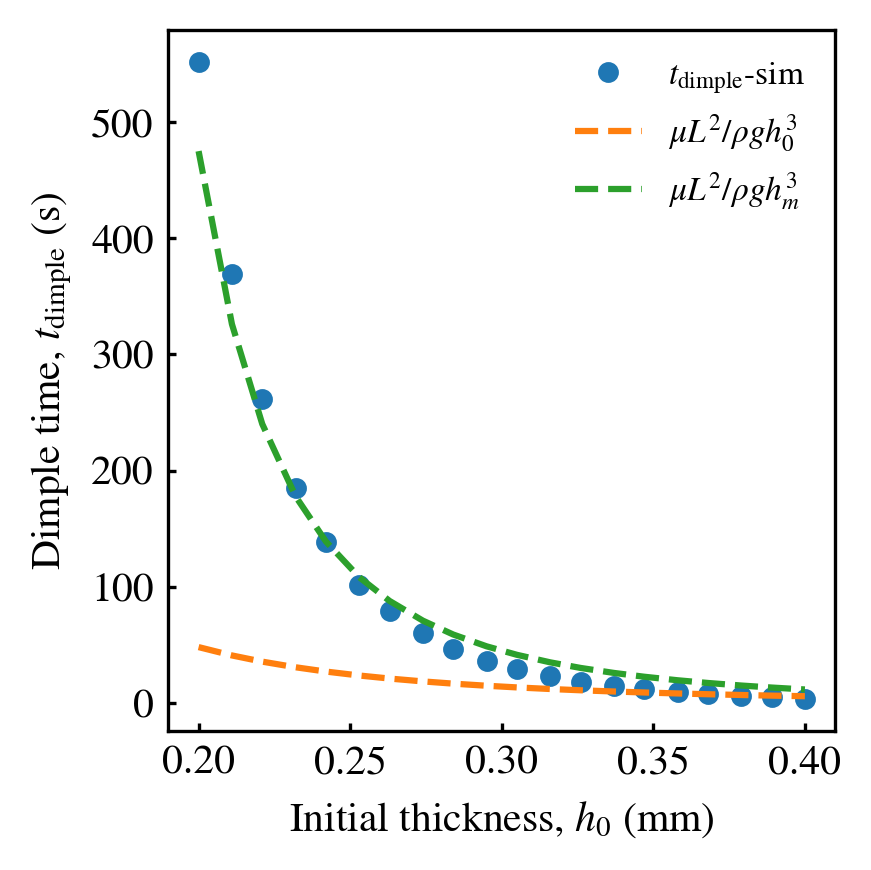

In [93]:
# check approx1 and approx2
g = pressure.loc[pressure.L == 33.7]
approx1 = g["mu"] * g["L"]**2 / g["h0"]**3 / 1e3 / 9.8 * 1e3 / 3
approx2 = g["mu"] * g["L"]**2 / ((g["hmax"]+g["hmin"])/2)**3 / 1e3 / 9.8 * 1e3 / 3
# approx3 = g["mu"] * g["L"]**2 / ((g["hmax"]+g["h0"])/2)**3 / 1e3 / 9.8 * 1e3

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.plot(g["h0"], g["t"], "o", ls="", label="$t_\mathrm{dimple}$-sim", markersize=4, color=bestcolor(0))
ax.plot(g["h0"], approx1, ls="--", label="$\mu L^2/\\rho g h_0^3$", color=bestcolor(1))
ax.plot(g["h0"], approx2, ls="--", label="$\mu L^2/\\rho g h_m^3$", color=bestcolor(2))
# ax.plot(g["h0"], approx3, ls="--", label="$\mu L^2/\\rho g h_\mathrm{max}^3$", color=bestcolor(3))
# plt.plot(g["h0"]*1e3, tau2, "o")
ax.legend(fontsize=8, frameon=False, loc="upper right")
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
# ax.set_xlim([0.23, .4])
# ax.set_ylim([0, 200])
# ax.loglog()
plt.tight_layout()
fig.savefig("approximation_check.svg")

In [95]:
pressure

,mu,sigma,h0,L,t,pg,pc,ld,lm,hmin,hmax,Vm
0,0.01,0.042,0.2,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,0.042,0.2,100.0,895.265713,0.946530,0.156025,10.220441,NaN,0.093923,0.190409,4.313604
2,0.01,0.042,0.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.042,0.2,14.7,1000.000000,0.334133,1.648456,5.332064,NaN,0.009770,0.043831,2.451425
4,0.01,0.042,0.2,19.5,1000.000000,0.364372,0.722321,6.955912,NaN,0.020291,0.057434,3.071831
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.01,0.042,0.4,800.0,15.566544,1.967617,0.562387,7.603802,221.710855,0.199427,0.400000,3.948015
496,0.01,0.042,0.4,81.1,10.000000,2.083289,0.611349,7.313627,32.830060,0.211577,0.423941,3.696232
497,0.01,0.042,0.4,85.8,10.280447,2.082140,0.586859,7.393587,34.904609,0.211405,0.423652,3.727723
498,0.01,0.042,0.4,90.5,10.568760,2.080104,0.576102,7.435872,36.997996,0.211302,0.423341,3.751527


In [100]:
lm

1     -0.046025
26    -0.042746
51    -0.040345
76    -0.038091
101   -0.036072
126   -0.034398
151   -0.032604
176   -0.031137
201   -0.029647
226   -0.028322
251   -0.026952
276   -0.026018
301   -0.025068
326   -0.023781
351   -0.023002
376   -0.021832
401   -0.021047
426   -0.019880
451   -0.019127
476   -0.017938
dtype: float64

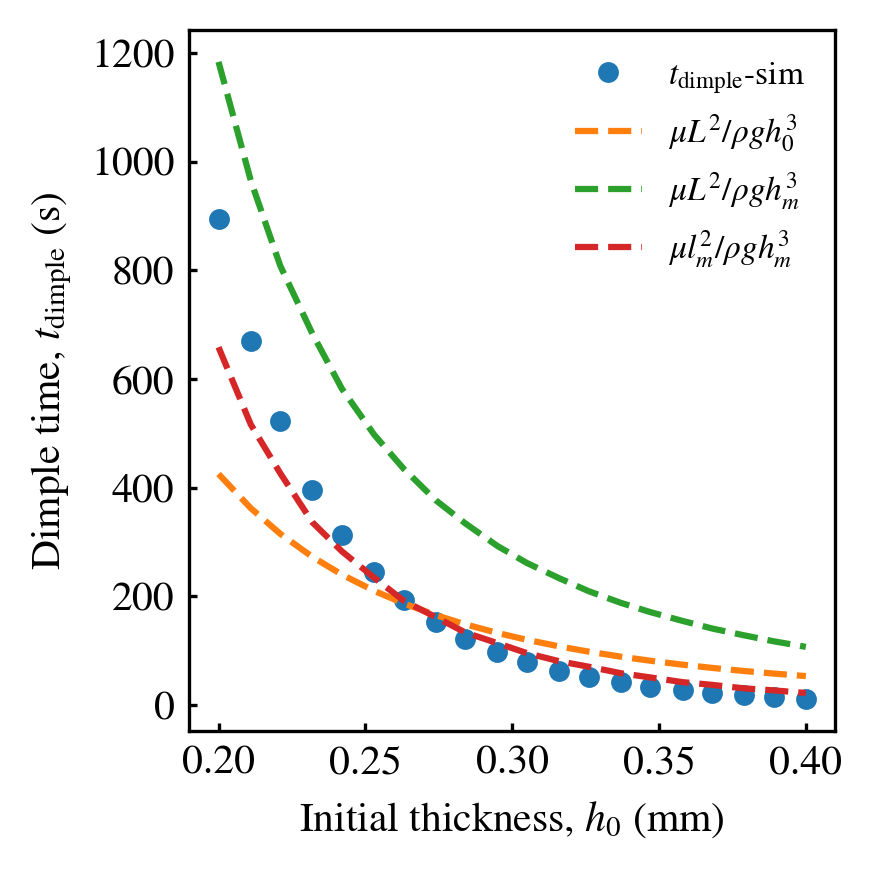

In [107]:
# check approx1 and approx2
g = pressure.loc[pressure.L == 100]
approx1 = g["mu"] * g["L"]**2 / g["h0"]**3 / 1e3 / 9.8 * 1e3 / 3
hm = ((g["hmax"]+g["hmin"])/2)
approx2 = g["mu"] * g["L"]**2 / hm**3 / 1e3 / 9.8 * 1e3 / 3
lm = g["Vm"] / (g["h0"] - hm)
approx3 = g["mu"] * lm**2 / ((g["hmax"]+g["hmin"])/2)**3 / 1e3 / 9.8 * 1e3 / 3

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.plot(g["h0"], g["t"], "o", ls="", label="$t_\mathrm{dimple}$-sim", markersize=4, color=bestcolor(0))
ax.plot(g["h0"], approx1, ls="--", label="$\mu L^2/\\rho g h_0^3$", color=bestcolor(1))
ax.plot(g["h0"], approx2, ls="--", label="$\mu L^2/\\rho g h_m^3$", color=bestcolor(2))
ax.plot(g["h0"], approx3, ls="--", label="$\mu l_m^2/\\rho g h_m^3$", color=bestcolor(3))
# plt.plot(g["h0"]*1e3, tau2, "o")
ax.legend(fontsize=8, frameon=False, loc="upper right")
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
# ax.set_xlim([0.23, .4])
# ax.set_ylim([0, 200])
# ax.loglog()
plt.tight_layout()
fig.savefig("approximation_check100.svg")

## 5 Film thickness approximation

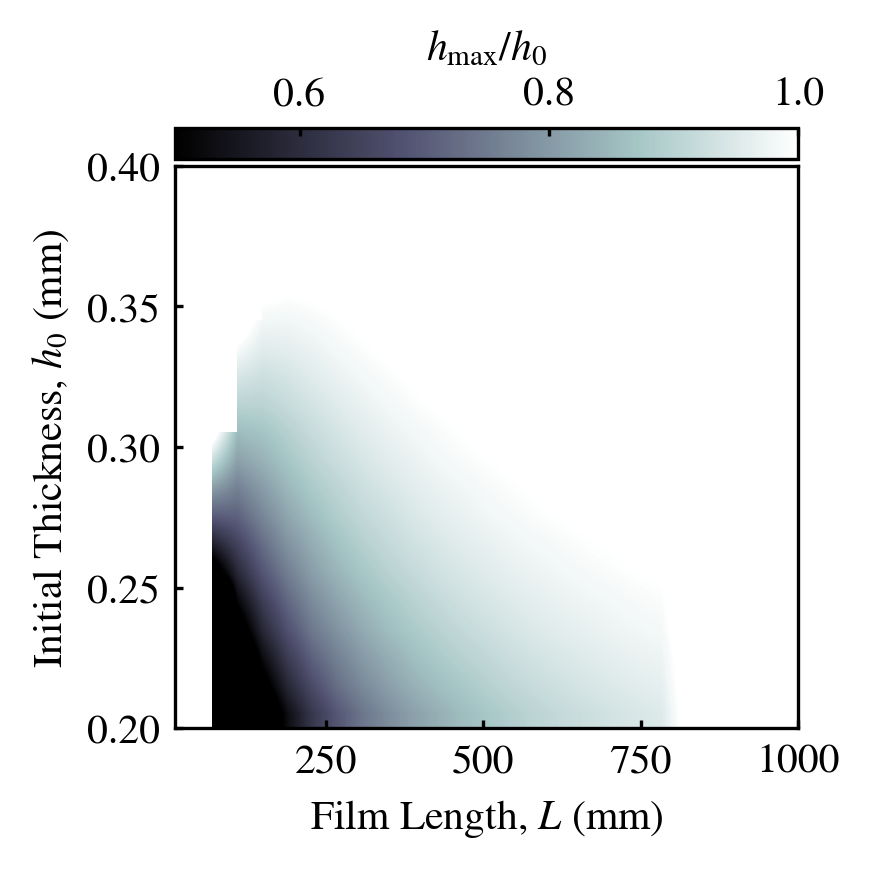

: 

In [ ]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = 0.5, 1
cmap = "bone"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow((pressure.hmax / pressure.h0).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$h_\mathrm{max}/h_0$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
# ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("hmax_approx.svg")

## 6 Meniscus volume

In [79]:
pressure

,mu,sigma,h0,L,t,pg,pc,ld,hmin,hmax,Vm
1,0.01,0.042,0.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,0.042,0.2,14.7,1000.000000,0.334133,1.648456,5332.064128,0.009770,0.043831,2.562081
3,0.01,0.042,0.2,19.5,1000.000000,0.364372,0.722321,6955.911824,0.020291,0.057434,3.173141
4,0.01,0.042,0.2,24.2,847.086827,0.372835,0.367285,8341.482966,0.037735,0.075741,3.523428
5,0.01,0.042,0.2,28.9,599.484250,0.520343,0.373182,8339.879760,0.052423,0.105466,3.527271
...,...,...,...,...,...,...,...,...,...,...,...
396,0.01,0.042,0.4,81.1,10.000000,2.083289,0.611349,7313.627255,0.211577,0.423941,3.166305
397,0.01,0.042,0.4,85.8,10.280447,2.082140,0.586859,7393.587174,0.211405,0.423652,3.187550
398,0.01,0.042,0.4,90.5,10.568760,2.080104,0.576102,7435.871743,0.211302,0.423341,3.208653
399,0.01,0.042,0.4,95.3,10.865158,2.078267,0.576132,7448.296593,0.211181,0.423033,3.230152


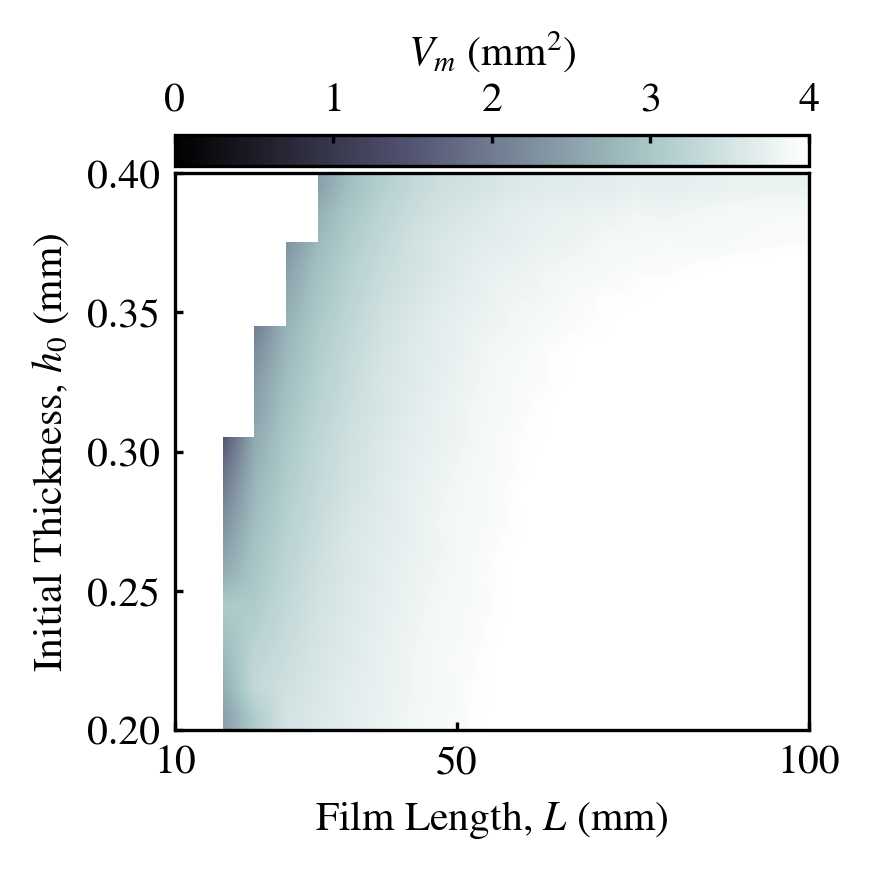

In [316]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
pressure = pressure.loc[pressure.L <= 1e2]
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = 0, 4
cmap = "bone"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(pressure.Vm.values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$V_m$ (mm$^2$)', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("meniscus_volume.svg")

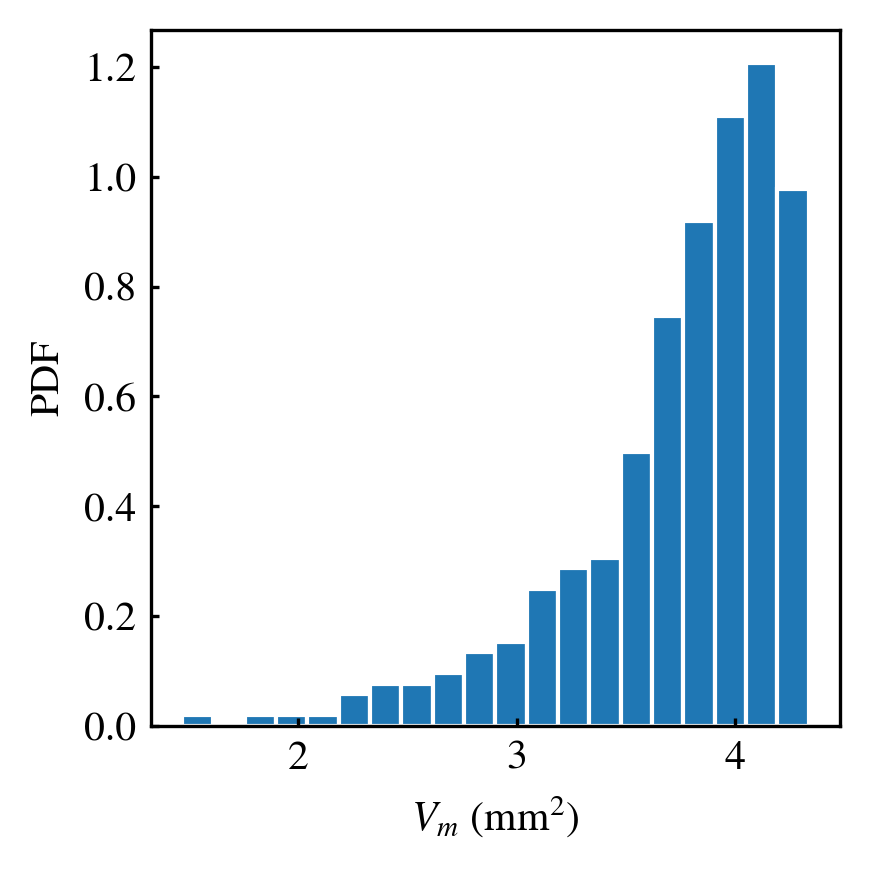

In [317]:
# histogram of Vm
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.hist(pressure.Vm, bins=20, color=bestcolor(0), edgecolor="white", density=True)
ax.set_xlabel("$V_m$ (mm$^2$)")
ax.set_ylabel("PDF")
plt.tight_layout()
fig.savefig("meniscus_volume_pdf.svg")

## 7 Characteristic length scale

What's the characteristic length for the suction?

### 7.1 The length that reaches $h_0$ again

Find the distance between the dimple and the first point that reaches $h_0$ as the characteristic length scale $l_m$ for gravity driven flow.

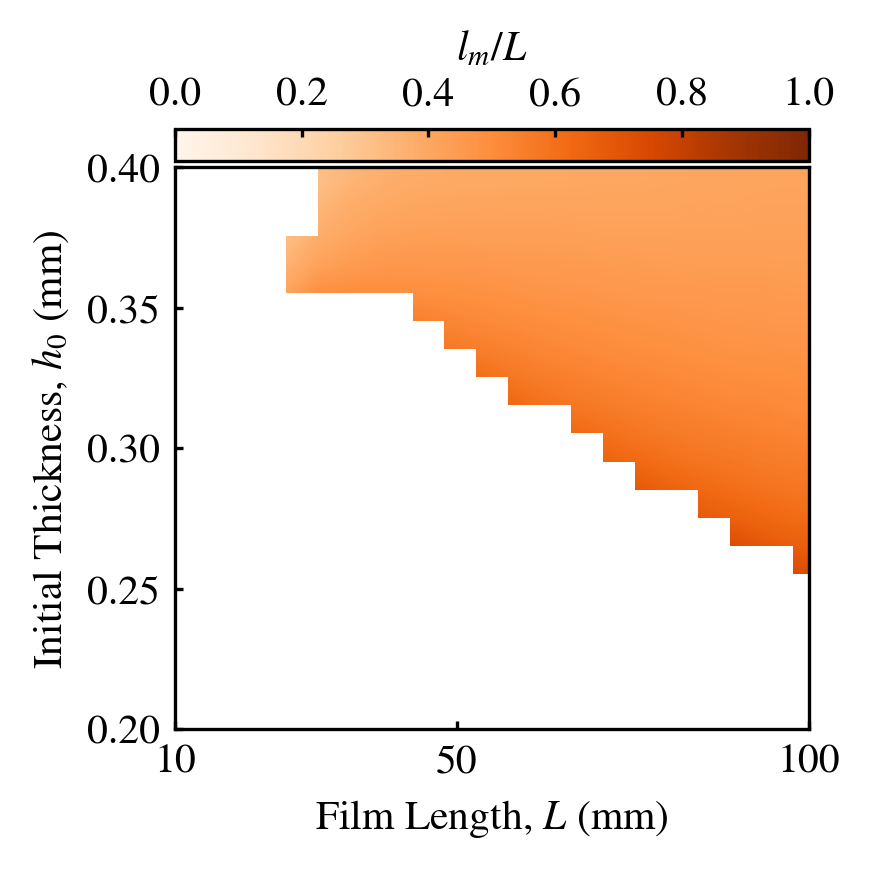

In [219]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = 0, 1
cmap = "Oranges"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow((pressure.lm/pressure.L).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$l_m/L$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("lm.svg")

### 7.2 Velocity profiles

Alternatively, we can look at the velocity distribution in the thin film. We know that the difference in the velocity gives rise to the shape change of the thin film:

$$
\frac{dh}{dt} = h\frac{dv}{dx}
$$

We can obtain it numerically using the $h$ data, as well as the boundary conditions $v(0) = v(L) = 0$.

In [205]:
folder = r"C:\Users\zl948\Documents\WPM_simulation\LH_PD"
df = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_2.74e-04_L_9.53e-02.h5"))

In [206]:
df

,0.001000,0.001014,0.001028,0.001042,0.001057,0.001072,0.001087,0.001102,0.001117,0.001133,...,882.969996,895.265713,907.732653,920.373200,933.189772,946.184819,959.360829,972.720319,986.265846,1000.000000
x,,,,,,,,,,,,,,,,,,,,,
0.000000,0.277574,0.277623,0.277672,0.277722,0.277773,0.277824,0.277876,0.277929,0.277982,0.278037,...,2.981836,2.981948,2.982058,2.982168,2.982279,2.982394,2.982514,2.982643,2.982781,2.982933
0.190982,0.278978,0.278978,0.278978,0.278978,0.278978,0.278978,0.278978,0.278979,0.278979,0.278979,...,2.372593,2.372701,2.372806,2.372910,2.373015,2.373123,2.373236,2.373356,2.373485,2.373625
0.381964,0.279685,0.279662,0.279638,0.279614,0.279590,0.279566,0.279541,0.279516,0.279490,0.279464,...,2.074677,2.074784,2.074889,2.074993,2.075098,2.075205,2.075318,2.075437,2.075565,2.075705
0.572946,0.279709,0.279682,0.279655,0.279628,0.279600,0.279572,0.279543,0.279515,0.279485,0.279455,...,1.852338,1.852445,1.852549,1.852653,1.852758,1.852866,1.852978,1.853097,1.853225,1.853364
0.763928,0.279140,0.279122,0.279105,0.279087,0.279070,0.279051,0.279033,0.279014,0.278996,0.278976,...,1.672233,1.672340,1.672445,1.672548,1.672653,1.672761,1.672873,1.672992,1.673119,1.673259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94.536072,0.293934,0.293684,0.293432,0.293176,0.292916,0.292653,0.292386,0.292115,0.291840,0.291562,...,0.072168,0.072129,0.072092,0.072056,0.072022,0.071990,0.071958,0.071928,0.071898,0.071869
94.727054,0.262832,0.262436,0.262034,0.261626,0.261213,0.260794,0.260369,0.259938,0.259501,0.259059,...,0.056559,0.056528,0.056499,0.056471,0.056444,0.056419,0.056394,0.056370,0.056347,0.056324
94.918036,0.210624,0.210154,0.209678,0.209195,0.208705,0.208209,0.207705,0.207195,0.206678,0.206153,...,0.039431,0.039409,0.039389,0.039370,0.039351,0.039333,0.039316,0.039299,0.039283,0.039267


In [207]:
t = df.columns.astype(float)

In [208]:
dhdt = df.diff(axis=1) / t.diff()

In [209]:
dvdx = dhdt / df

In [210]:
dx = df.index.values[1] - df.index.values[0]
dv = dvdx * dx

In [211]:
v = dv.cumsum(axis=0)

In [212]:
i

800

Text(0, 0.5, '$v$ (mm/s)')

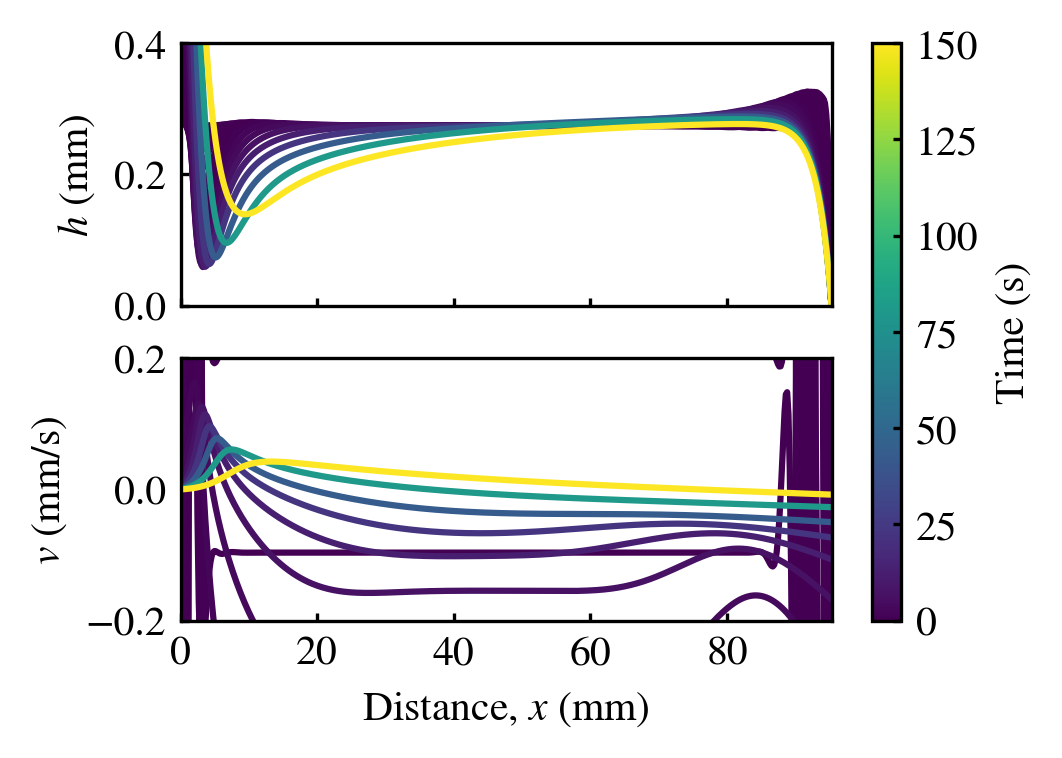

In [217]:
fig, ax = plt.subplots(2, 1, figsize=(3.5, 2.5), dpi=300, sharex=True)
cmap = plt.get_cmap("viridis")
tmax = 150
ind = np.argmin(np.abs(t-tmax))
for i in np.linspace(10, ind, 20).astype(int):
    ax[0].plot(df.index, df.iloc[:, i], label=f"{i} s", color=cmap(t[i]/tmax))
    ax[1].plot(df.index, v.iloc[:, i], label=f"{i} s", color=cmap(t[i]/tmax))
# colorbar for time
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")
plt.xlabel("Distance, $x$ (mm)")
ax[0].set_ylabel("$h$ (mm)")
ax[0].set_xlim(0, df.index.max())
ax[0].set_ylim(0, 0.4)
ax[1].set_ylim(-.2, .2)
ax[1].set_ylabel("$v$ (mm/s)")

### 7.3 Balance between gravity and drag at dimple time

$$
\rho g h_0 \sim \frac{\mu l_m^2 / t_\mathrm{dimple}}{h_0^2}
$$

$$
l_m \sim \left( \rho g h_0^3 t_\mathrm{dimple} / \mu \right)^{1/2}
$$

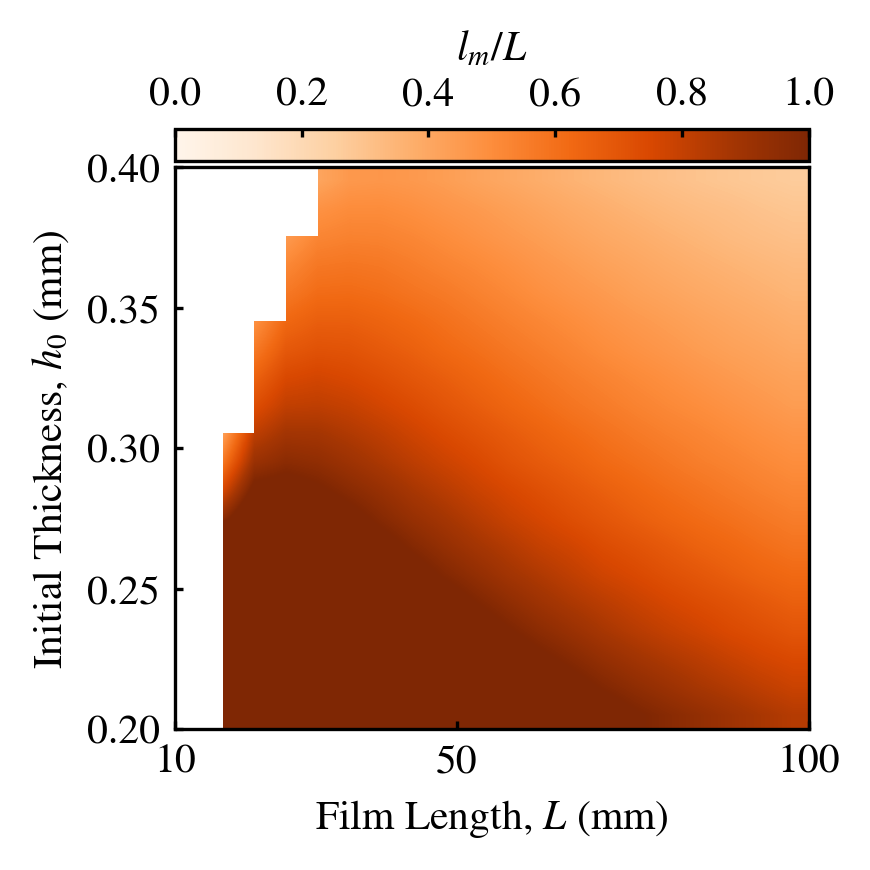

In [299]:
rho = 1e3
g = 9.8
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.sort_values(by=["h0", "L"], inplace=True)
pressure = pressure.loc[pressure.L <= 1e-1]
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
cmap = "Oranges"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
pressure["lm"] = (rho * g * pressure.h0**3 * pressure.t / pressure.mu) ** 0.5
vmin, vmax = 0, 1
ax.imshow((pressure.lm/pressure.L).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min()*1e3, pressure.L.max()*1e3, pressure.h0.min()*1e3, pressure.h0.max()*1e3],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$l_m/L$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("lm.svg")

In [51]:
pressure

,mu,sigma,h0,L,t,pg,pc,ld,lm,hmin,hmax,Vm
2,0.01,0.042,0.0002,0.0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.042,0.0002,0.0147,1000.000000,0.334133,1.648456,5.332064,0.088544,0.009770,0.043831,2.451425
4,0.01,0.042,0.0002,0.0195,1000.000000,0.364372,0.722321,6.955912,0.088544,0.020291,0.057434,3.071831
6,0.01,0.042,0.0002,0.0242,847.086827,0.372835,0.367285,8.341483,0.081493,0.037735,0.075741,3.494787
7,0.01,0.042,0.0002,0.0289,599.484250,0.520343,0.373182,8.339880,0.068556,0.052423,0.105466,3.589715
...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.01,0.042,0.0004,0.0811,10.000000,2.083289,0.611349,7.313627,0.025044,0.211577,0.423941,3.696232
497,0.01,0.042,0.0004,0.0858,10.280447,2.082140,0.586859,7.393587,0.025393,0.211405,0.423652,3.727723
498,0.01,0.042,0.0004,0.0905,10.568760,2.080104,0.576102,7.435872,0.025746,0.211302,0.423341,3.751527
499,0.01,0.042,0.0004,0.0953,10.865158,2.078267,0.576132,7.448297,0.026105,0.211181,0.423033,3.769332


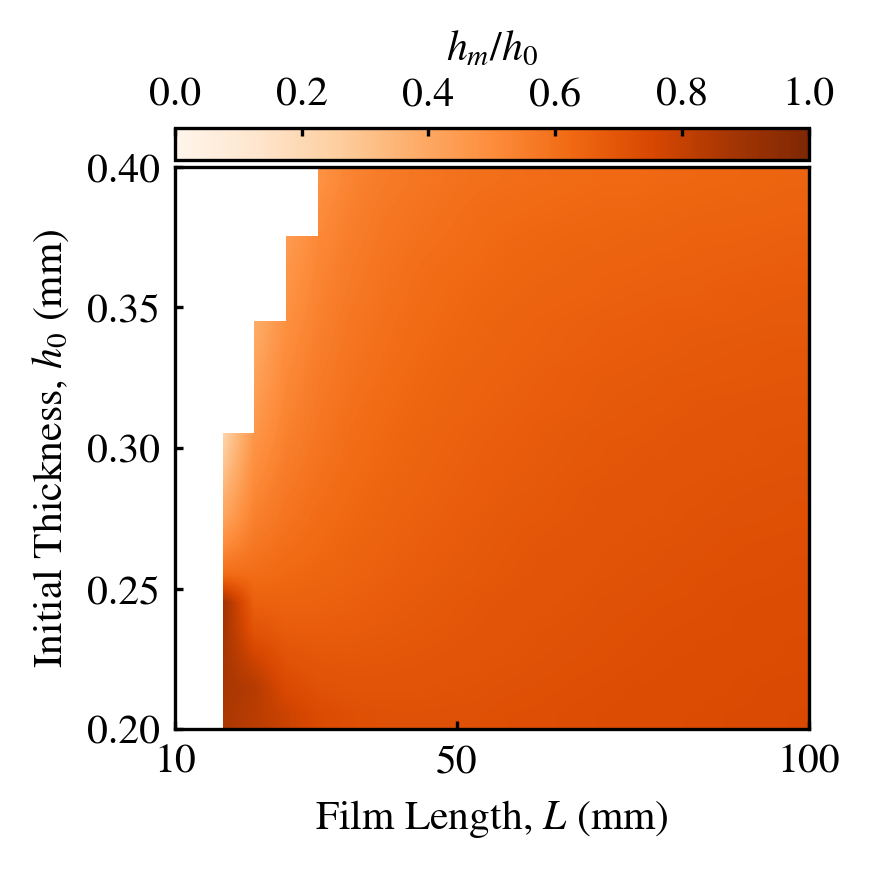

In [53]:
rho = 1e3
g = 9.8
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.sort_values(by=["h0", "L"], inplace=True)
pressure = pressure.loc[pressure.L <= 1e-1]
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
cmap = "Oranges"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
pressure["lm"] = (rho * g * pressure.h0**3 * pressure.t / pressure.mu) ** 0.5
vmin, vmax = 0, 1
hm = pressure.h0 - pressure.Vm*1e-6 / pressure.lm
ax.imshow((hm/pressure.h0).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min()*1e3, pressure.L.max()*1e3, pressure.h0.min()*1e3, pressure.h0.max()*1e3],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$h_m/h_0$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("hm.svg")

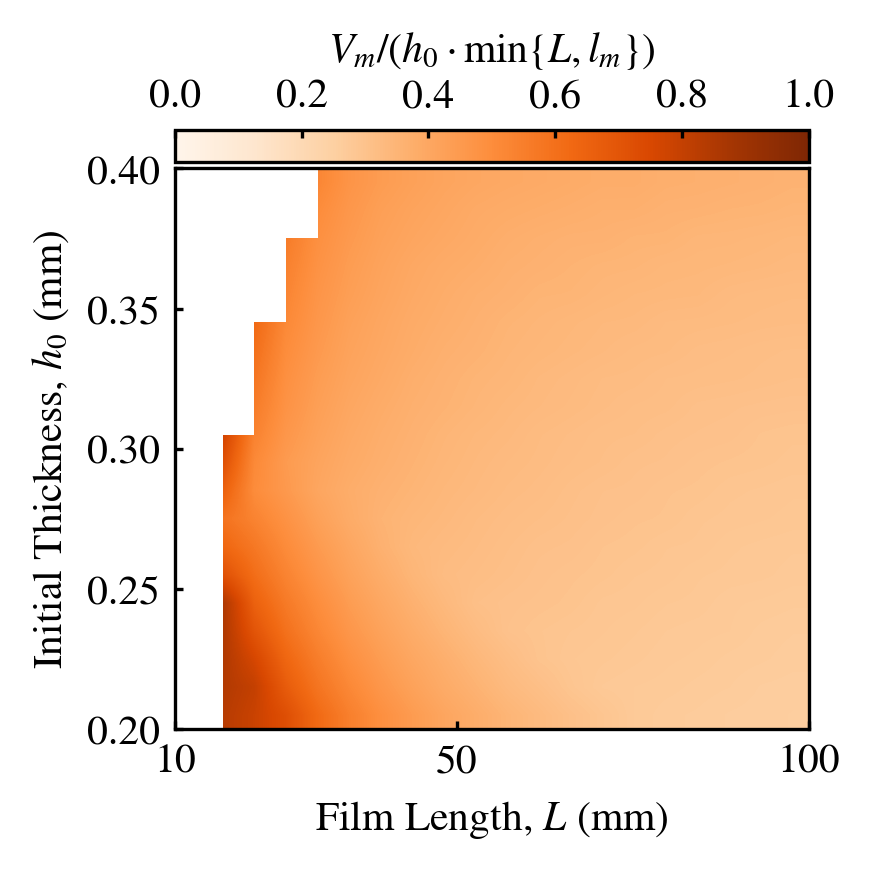

In [6]:
rho = 1e3
g = 9.8
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.sort_values(by=["h0", "L"], inplace=True)
pressure = pressure.loc[pressure.L <= 1e-1]
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
cmap = "Oranges"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
pressure["lm"] = (rho * g * pressure.h0**3 * pressure.t / pressure.mu) ** 0.5
vmin, vmax = 0, 1
ax.imshow((pressure.Vm*1e-6/pressure.loc[:, ["lm", "L"]].min(axis=1)/pressure.h0).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min()*1e3, pressure.L.max()*1e3, pressure.h0.min()*1e3, pressure.h0.max()*1e3],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$V_m/(h_0\cdot\min\{L,l_m\})$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("Vm_lmh0.svg")

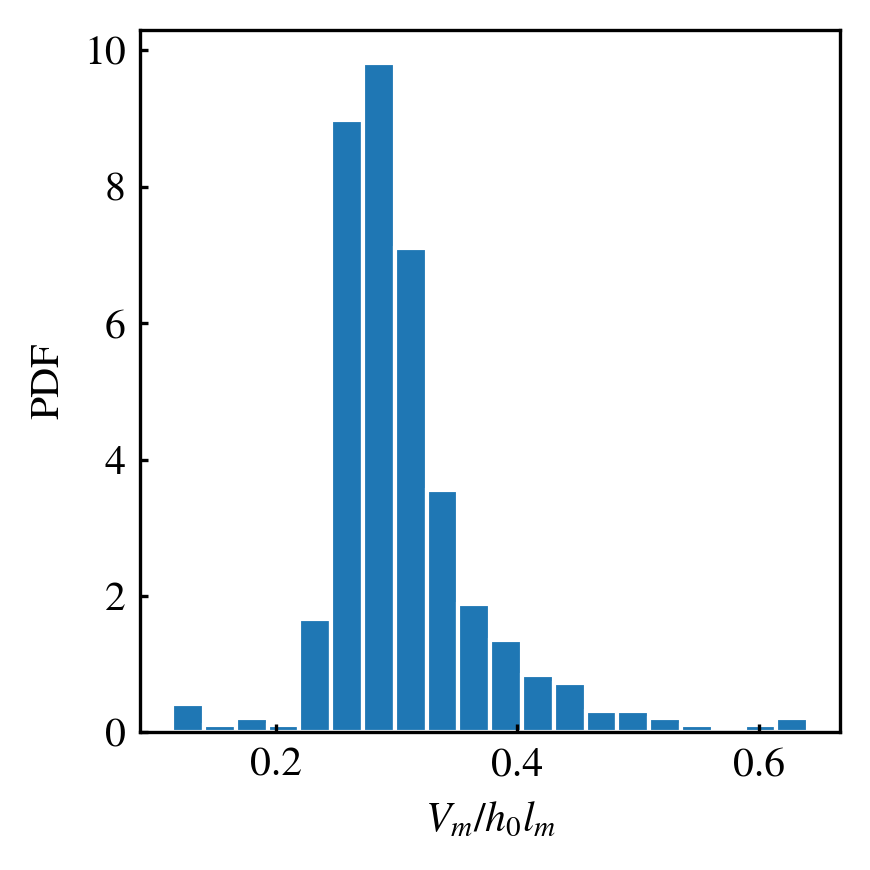

In [301]:
# histogram
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.hist(pressure.Vm*1e-6/pressure.lm/pressure.h0, bins=20, color=bestcolor(0), edgecolor="white", density=True)
ax.set_xlabel("$V_m/h_0l_m$")
ax.set_ylabel("PDF")
plt.tight_layout()
fig.savefig("Vm_lmh0_pdf.svg")

In [307]:
x = np.linspace(0, 1, 100)
y = np.sin(x)
inds = y > 0.5

In [310]:
np.where(inds)[0][0]

52

In [341]:
pressure

,mu,sigma,h0,L,t,pg,pc,ld,lm,hmin,hmax,Vm
0,0.01,0.042,0.0002,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,0.042,0.0002,0.1000,895.265713,0.946530,0.156025,10.220441,NaN,0.093923,0.190409,4.313604
2,0.01,0.042,0.0002,0.0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.042,0.0002,0.0147,1000.000000,0.334133,1.648456,5.332064,NaN,0.009770,0.043831,2.451425
4,0.01,0.042,0.0002,0.0195,1000.000000,0.364372,0.722321,6.955912,NaN,0.020291,0.057434,3.071831
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.01,0.042,0.0004,0.8000,15.566544,1.967617,0.562387,7.603802,221.710855,0.199427,0.400000,3.948015
496,0.01,0.042,0.0004,0.0811,10.000000,2.083289,0.611349,7.313627,32.830060,0.211577,0.423941,3.696232
497,0.01,0.042,0.0004,0.0858,10.280447,2.082140,0.586859,7.393587,34.904609,0.211405,0.423652,3.727723
498,0.01,0.042,0.0004,0.0905,10.568760,2.080104,0.576102,7.435872,36.997996,0.211302,0.423341,3.751527


In [69]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
rho = 1e3
g = 9.8
pressure["lm"] = (rho * g * pressure.h0**3 * pressure.t / pressure.mu) ** 0.5 
pressure["hmax"] *= 1e-3

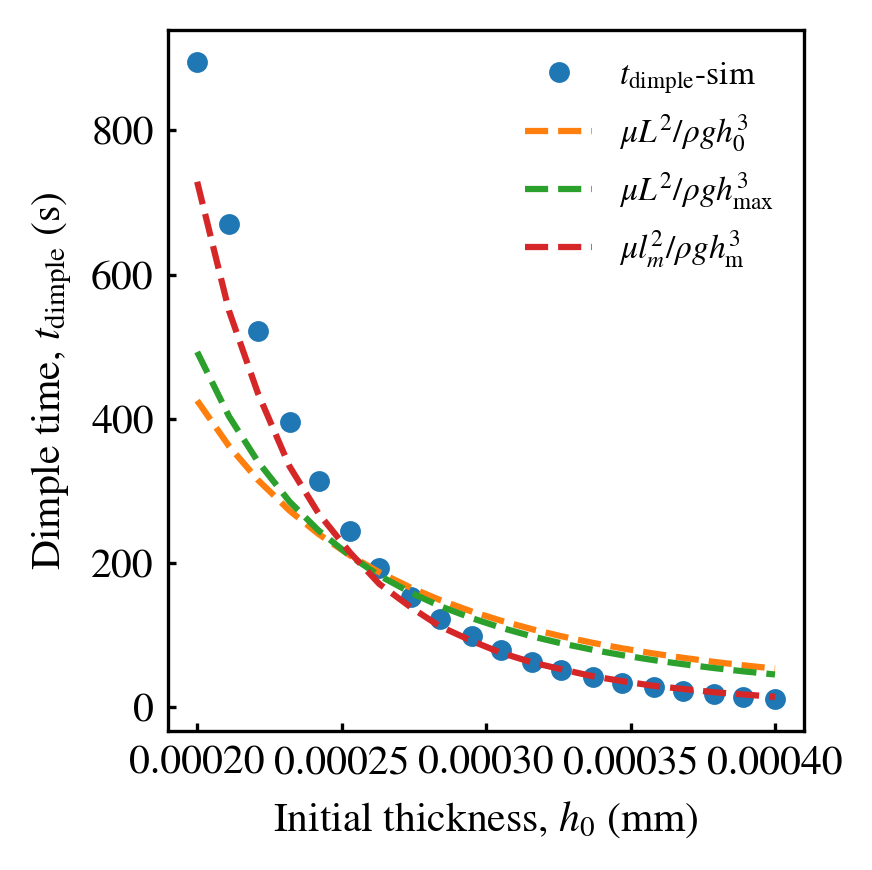

In [70]:
# check approx1 and approx2
pre = pressure.loc[pressure.L == 0.1]
approx1 = pre["mu"] * pre["L"]**2 / pre["h0"]**3 / rho / g / 3
approx2 = pre["mu"] * pre["L"]**2 / pre["hmax"]**3 / rho / g / 3
approx3 = pre["mu"] * pre["lm"]**2 / pre["h0"]**3 / rho / g * (1 - pre["Vm"]*1e-6/pre["h0"]/pre["lm"])**-3 / 3

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.plot(pre["h0"], pre["t"], "o", ls="", label="$t_\mathrm{dimple}$-sim", markersize=4, color=bestcolor(0))
ax.plot(pre["h0"], approx1, ls="--", label="$\mu L^2/\\rho g h_0^3$", color=bestcolor(1))
ax.plot(pre["h0"], approx2, ls="--", label="$\mu L^2/\\rho g h_\mathrm{max}^3$", color=bestcolor(2))
ax.plot(pre["h0"], approx3, ls="--", label="$\mu l_m^2/\\rho g h_\mathrm{m}^3$", color=bestcolor(3))
# plt.plot(g["h0"]*1e3, tau2, "o")
ax.legend(fontsize=8, frameon=False, loc="upper right")
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
# ax.set_xlim([0.23, .4])
# ax.set_ylim([0, 200])
# ax.loglog()
plt.tight_layout()
# fig.savefig("approximation_check.svg")

Text(0, 0.5, '$y$')

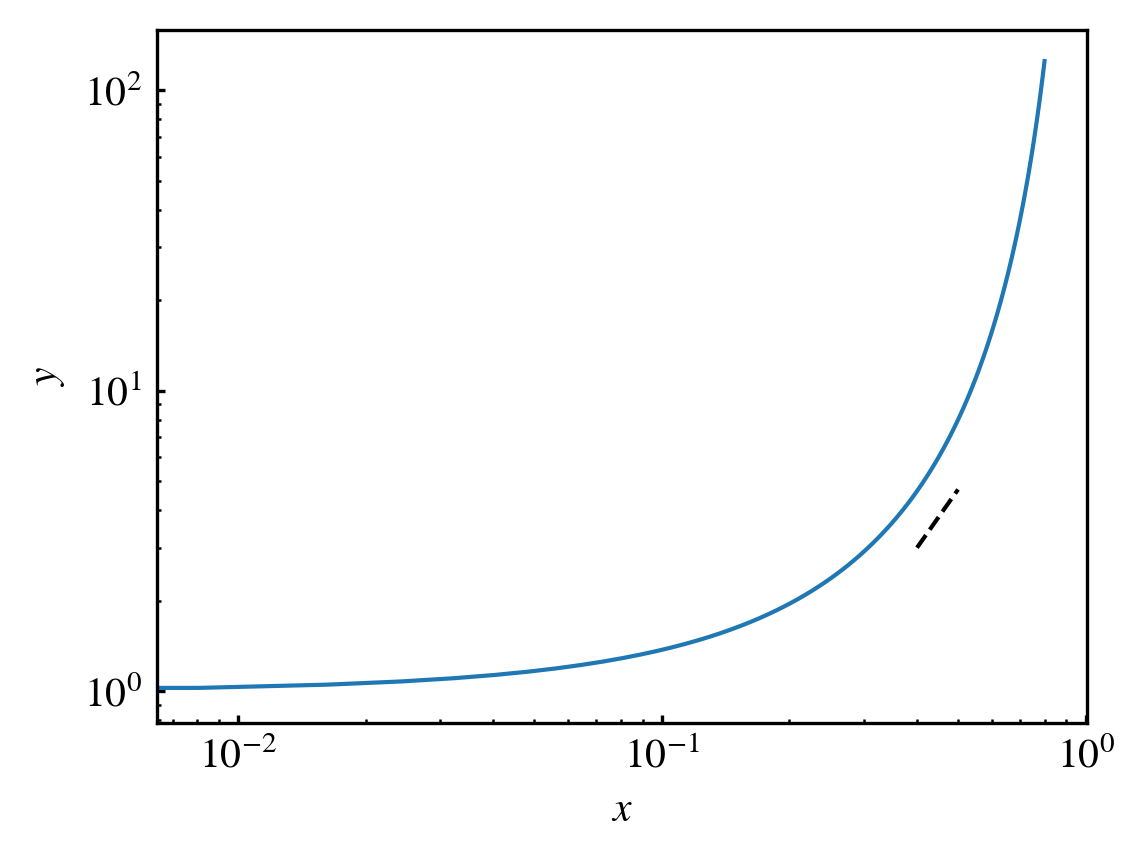

In [56]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
x = np.linspace(0, 0.8, 100)
t = (1 - x) ** -3
ax.plot(x, t, lw=1)
ax.loglog()
x = np.linspace(0.4, 0.5, 100)
y = x ** 2
y = y / y[0] * 3 
ax.plot(x, y, "--", color="black", lw=1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")